# Combinar RFF con Bagging con los métodos de Logit y SVM

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from time import time
import math

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm
from sklearn.pipeline import Pipeline
from sklearn.kernel_approximation import RBFSampler
from sklearn.kernel_approximation import Nystroem
from sklearn.decomposition import PCA

#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC

/home/hobber/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
digits = datasets.load_digits()

In [3]:
data = digits.data
target = digits.target

In [4]:
data /= 16
data -= data.mean(axis = 0)

In [5]:
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [6]:
data_train = data[:N_train]
data_test = data[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

In [7]:
logit_clf = Pipeline([
        ("rff", RBFSampler(gamma=.2)),
        #("pca", PCA(n_components = 0.9, svd_solver = "full")),
        ("logit", LogisticRegression(C = 1, multi_class = 'multinomial', solver = 'lbfgs'))
    ])

In [8]:
logit_clf = Pipeline([
        ("rff", RBFSampler(gamma=.2)),
        #("pca", PCA(n_components = 0.9, svd_solver = "full")),
        ("lsvm", LinearSVC(C = 1))
    ])

In [9]:
n_components = 700
#Esta cantidad porque en otro notebook se ve como a partir de aquí ya es casi horizontal

In [10]:
logit_clf.set_params(rff__n_components = n_components)

Pipeline(memory=None,
     steps=[('rff', RBFSampler(gamma=0.2, n_components=700, random_state=None)), ('lsvm', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [11]:
bagging = BaggingClassifier(logit_clf, n_estimators = 80)

In [12]:
bagging.fit(data_train, target_train)

BaggingClassifier(base_estimator=Pipeline(memory=None,
     steps=[('rff', RBFSampler(gamma=0.2, n_components=700, random_state=None)), ('lsvm', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=80, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [13]:
bag_train_score = bagging.score(data_train, target_train)
bag_test_score = bagging.score(data_test, target_test)

In [14]:
bag_train_score, bag_test_score

(1.0, 0.9599332220367279)

### Logit vs RFF + Logit vs Ensembled RFF + Logit

La cantidad de featurues serán 500

In [15]:
digits = datasets.load_digits()

data = digits.data
target = digits.target

data /= 16
data -= data.mean(axis = 0)

N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

data_train = data[:N_train]
data_test = data[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

In [16]:
logit = LogisticRegression(C = 1, multi_class = 'multinomial', solver = 'lbfgs')

In [17]:
logit_rff = Pipeline([
        ("rff", RBFSampler(gamma=.2)),
        #("pca", PCA(n_components = 0.9, svd_solver = "full")),
        ("logit", LogisticRegression(C = 1, multi_class = 'multinomial', solver = 'lbfgs'))
    ])

In [18]:
logit_rff = Pipeline([
        ("rff", RBFSampler(gamma=.2)),
        #("pca", PCA(n_components = 0.9, svd_solver = "full")),
        ("lsvm", LinearSVC(C = 1))
    ])

In [19]:
n_components = 700
#Esta cantidad porque en otro notebook se ve como a partir de aquí ya es casi horizontal

logit_rff.set_params(rff__n_components = n_components)

Pipeline(memory=None,
     steps=[('rff', RBFSampler(gamma=0.2, n_components=700, random_state=None)), ('lsvm', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [20]:
logit_ensemble = BaggingClassifier(logit_rff, n_estimators = 80)

In [21]:
logit.fit(data_train, target_train)
logit_rff.fit(data_train, target_train)
logit_ensemble.fit(data_train, target_train)

BaggingClassifier(base_estimator=Pipeline(memory=None,
     steps=[('rff', RBFSampler(gamma=0.2, n_components=700, random_state=None)), ('lsvm', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=80, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [22]:
logit_train_score = logit.score(data_train, target_train)
logit_rff_train_score = logit_rff.score(data_train, target_train)
logit_ensemble_train_score = logit_ensemble.score(data_train, target_train)

logit_test_score = logit.score(data_test, target_test)
logit_rff_test_score = logit_rff.score(data_test, target_test)
logit_ensemble_test_score = logit_ensemble.score(data_test, target_test)

In [23]:
logit_train_score, logit_rff_train_score, logit_ensemble_train_score

(0.991652754590985, 0.9991652754590985, 1.0)

In [24]:
logit_test_score, logit_rff_test_score, logit_ensemble_test_score

(0.9215358931552587, 0.9632721202003339, 0.9532554257095158)

### LinearSVM vs RFF + LinearSVM vs Ensembled RFF + LinearSVM

La cantidad de featurues serán 500

In [25]:
digits = datasets.load_digits()

data = digits.data
target = digits.target

data /= 16
data -= data.mean(axis = 0)

N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

data_train = data[:N_train]
data_test = data[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

In [26]:
lsvm = LinearSVC()

lsvm_rff = Pipeline([
        ("rff", RBFSampler(gamma=.2)),
        #("pca", PCA(n_components = 0.9, svd_solver = "full")),
        ("lsvm", LinearSVC())
    ])

In [27]:
n_components = 700
#Esta cantidad porque en otro notebook se ve como a partir de aquí ya es casi horizontal

In [28]:
logit_rff.set_params(rff__n_components = n_components)

Pipeline(memory=None,
     steps=[('rff', RBFSampler(gamma=0.2, n_components=700, random_state=None)), ('lsvm', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [29]:
lsvm_ensemble = BaggingClassifier(lsvm_rff, n_estimators = 80)

In [30]:
lsvm.fit(data_train, target_train)
lsvm_rff.fit(data_train, target_train)
lsvm_ensemble.fit(data_train, target_train)

BaggingClassifier(base_estimator=Pipeline(memory=None,
     steps=[('rff', RBFSampler(gamma=0.2, n_components=100, random_state=None)), ('lsvm', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=80, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [31]:
lsvm_train_score = lsvm.score(data_train, target_train)
lsvm_rff_train_score = lsvm_rff.score(data_train, target_train)
lsvm_ensemble_train_score = lsvm_ensemble.score(data_train, target_train)

In [32]:
lsvm_test_score = lsvm.score(data_test, target_test)
lsvm_rff_test_score = lsvm_rff.score(data_test, target_test)
lsvm_ensemble_test_score = lsvm_ensemble.score(data_test, target_test)

In [33]:
lsvm_train_score, lsvm_rff_train_score, lsvm_ensemble_train_score

(0.991652754590985, 0.9941569282136895, 0.998330550918197)

In [34]:
lsvm_test_score, lsvm_rff_test_score, lsvm_ensemble_test_score

(0.9131886477462438, 0.9315525876460768, 0.9432387312186978)

### Increasing the number of features

In [35]:
sample_sizes = 30 * np.arange(1, 20)

In [36]:
logit_rff_scores = []
logit_ensemble_rff_scores = []

In [37]:

logit_rff = Pipeline([
        ("rff", RBFSampler(gamma=.2)),
        #("pca", PCA(n_components = 0.9, svd_solver = "full")),
        ("logit", LogisticRegression(C = 1, multi_class = 'multinomial', solver = 'lbfgs'))
    ])
for D in sample_sizes:
    logit_rff.set_params(rff__n_components = D)
    logit_ensemble = BaggingClassifier(logit_rff, n_estimators = 10)
    
    
    logit_rff.fit(data_train, target_train)
    logit_ensemble.fit(data_train, target_train)
    
    logit_rff_score = logit_rff.score(data_test, target_test)
    logit_ensemble_score = logit_ensemble.score(data_test, target_test)
    
    logit_rff_scores.append(logit_rff_score)
    logit_ensemble_rff_scores.append(logit_ensemble_score)

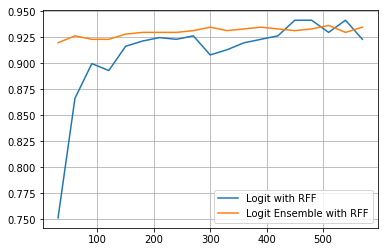

In [38]:
accuracy = plt.subplot(111)
accuracy.plot(sample_sizes, logit_rff_scores, label = "Logit with RFF")
accuracy.plot(sample_sizes, logit_ensemble_rff_scores, label = "Logit Ensemble with RFF")
accuracy.grid(True)
accuracy.legend(loc="best")